In [1]:
#科比职业生涯投球统计分析
#主要讲sklearn，处理机器学习工作的一般流程等
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

'''
跟机器学习挂勾的库就是 --> sklearn
sklearn不做神经网络，做的很不好，它是做传统的机器学习算法，决策树，随机森林，逻辑回归，垂直向量机等。
神经网络用tensorflow做，格调更高，tensorflow主要用在深度学习上，
'''


G:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
G:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\n跟机器学习挂勾的库就是 --> sklearn\nsklearn不做神经网络，做的很不好，它是做传统的机器学习算法，决策树，随机森林，逻辑回归，垂直向量机等。\n神经网络用tensorflow做，格调更高，tensorflow主要用在深度学习上，\n'

In [2]:
rawKobe = pd.read_csv('kobe_data.csv')
print(rawKobe.shape)
rawKobe.head()


(30697, 25)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
#特征数据：（实际算法拿什么去学，输入x，真实值，比如投球点，跟谁比赛，哪年之类的）
#标签数据：（比如这次投篮进了还是没进，要么0要么1，只有两种可能）

#一般流程，数据来了以后分成两部分：
#训练数据 - >建一个model模型，
#测试数据 -> 测试下这个model效果怎样。
'''
有标签的用作训练集
没有标签的用作待测试的数据
'''


In [3]:
#以下取flag 列，投球进没进 
#看两个指标对它的影响:loc_x loc_y 代表这次投球出手的位置
readyKobe = rawKobe[pd.notnull(rawKobe['shot_made_flag'])]
#过滤掉空值
print(readyKobe.shape)
#打印看下有10000多条空的被过滤掉了

(25697, 25)


Text(0.5,1,'lat and lon')

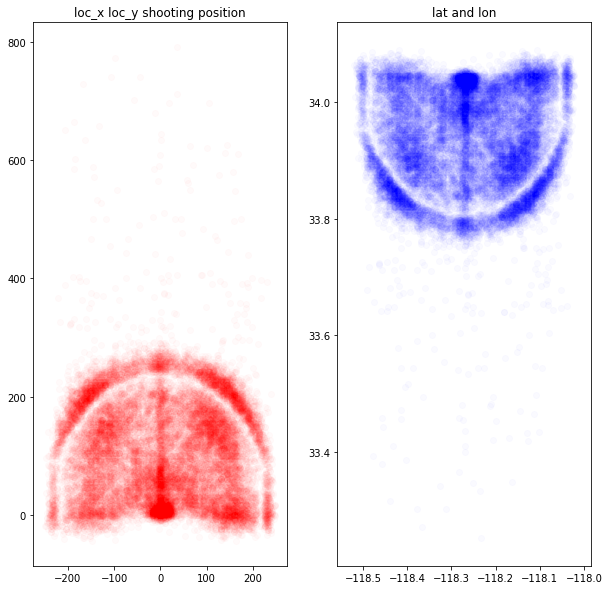

In [4]:
#画出来看下
plt.figure(figsize=(10,10))
#画布
plt.subplot(121)#子图 一行两列第一列
plt.scatter(readyKobe.loc_x,readyKobe.loc_y,color='R',alpha=0.02)#alpha透明度
#散点图
plt.title('loc_x loc_y shooting position')

plt.subplot(122)#子图二 一行两列第二列
plt.scatter(readyKobe.lon,readyKobe.lat,color='B',alpha=0.02)
#画lon lat经纬度
plt.title('lat and lon')
#由图可知是一个蓝框形状，数据更直观了


In [9]:
#有时需要把特征转换下
#例如把上面平面坐标转为极坐标，即不统计x,y位置了，
#统计当前位置（距离）和角度。更有助于机器理解。

#算法固然重要，输入数据也是很重要的。特征怎么表现，有时不那么直白
#机器学习花费时间最多的地方就是做特征
#做特征是非常非常难的
#提特征靠经验，所以教授比较厉害，
#要想想什么样的特征更适合模型的表达




In [5]:
#平面直角坐标转极坐标（【即表示为：坐标点到原点距离和到原点连线与x轴的角度】） 
#点到圆点距离（即直角三角形的斜边长） = 根号下 x^2+y^2 ，加到原始数，新列名叫dist
rawKobe['dist'] = np.sqrt(rawKobe['loc_x']**2 + rawKobe['loc_y']**2)
#角度tanθ = y/x，θ = arctan()……
loc_x_zero = rawKobe['loc_x'] == 0
#print(loc_x_zero) #loc_x 为0 的bool值
#print(np.array([0]*len(rawKobe)).shape)
#30697行为0的值
#print(len(rawKobe))
#30697行数，数据长度是行数不是列数
rawKobe['angle'] = np.array([0]*len(rawKobe))
#生成一个新列angle存放角度，数据条目同原始数据长度，值为0
#print(~loc_x_zero)#~代表取反，非，x不等于0的索引
#print(rawKobe['loc_y'][~loc_x_zero])
#y/x 分别取[~loc_x_zero]x不等于0时的值，
#因为0不能做除数，y是被除数(在上面大的一般是被除，divide 即被分数)
rawKobe['angle'][~loc_x_zero] = np.arctan(rawKobe['loc_y'][~loc_x_zero]/rawKobe['loc_x'][~loc_x_zero])
#loc_x不为0的（第二个[]是过滤条件，索引）angle列 赋值为 arctan y/x 即 极坐标的角度。
rawKobe['angle'][loc_x_zero] = np.pi/2
#loc_x为0的angle列赋值为 pi/2 ,x轴值为0时角度为圆周的一半180度或0度？
rawKobe.head()


G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,dist,angle
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,181.859836,0.407058
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,157.000000,-0.000000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,168.600119,-0.928481
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,222.865430,0.903063
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,0.000000,1.570796


In [6]:
#其它函数
rawKobe['remaining_time'] = rawKobe['minutes_remaining']*60 +rawKobe['seconds_remaining']
#列计算生成新列
print(readyKobe.action_type.unique())
#unique()取某列不重复的值，去重？
print(readyKobe.shot_type.value_counts())
#value_counts()统计一列中某个值的个数


['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Reverse Dunk Shot' 'Slam Dunk Shot' 'Driving Layup Shot'
 'Turnaround Jump Shot' 'Reverse Layup Shot' 'Tip Shot'
 'Running Hook Shot' 'Alley Oop Dunk Shot' 'Dunk Shot'
 'Alley Oop Layup shot' 'Running Dunk Shot' 'Driving Finger Roll Shot'
 'Running Layup Shot' 'Finger Roll Shot' 'Fadeaway Jump Shot'
 'Follow Up Dunk Shot' 'Hook Shot' 'Turnaround Hook Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Tip Shot'
 'Running Reverse Layup Shot' 'Driving Finger Roll Layup Shot'
 'Fadeaway Bank shot' 'Pullup Jump shot' 'Finger Roll Layup Shot'
 'Turnaround Fadeaway shot' 'Driving Reverse Layup Shot'
 'Driving Slam Dunk Shot' 'Step Back Jump shot' 'Turnaround Bank shot'
 'Reverse Slam Dunk Shot' 'Floating Jump shot' 'Putback Slam Dunk Shot'
 'Running Bank shot' 'Driving Bank shot' 'Driving Jump shot'
 'Putback Layup Shot' 'Putback Dun

In [7]:
#unique()也可做为过滤条件
readyKobe['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [8]:
#还可以lambda x 应用函数，比如分出年份后的场次
readyKobe['season'] = readyKobe['season'].apply(lambda x: int(x.split('-')[1]))
readyKobe['season'].unique()


G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0], dtype=int64)

In [9]:
#筛选出部分数据，如与哪个队做战，并设置新列名
pd.DataFrame({'matchup':readyKobe.matchup,'opponent':readyKobe.opponent})

,matchup,opponent
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
8,LAL @ POR,POR
9,LAL @ POR,POR
10,LAL @ POR,POR
11,LAL vs. UTA,UTA


Text(0.5,1,'dist & shot_distance')

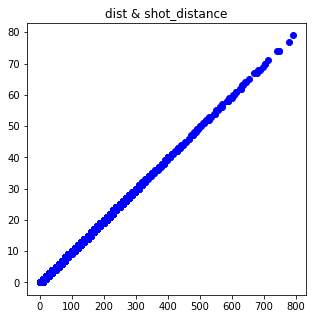

In [10]:
#源数据中有一个shot_distance，看看和我们新加的dist有什么关系。
#画散点图
plt.figure(figsize=(5,5))
plt.scatter(rawKobe.dist,rawKobe.shot_distance,color='B')
plt.title('dist & shot_distance')
#由图可知是一条规律的斜线，说明它们是完成一个模子按比例的线性关系 。
#所以两个特征代表一个特征，留一个即可。
#plt.scatter(rawKobe.dist,rawKobe.loc_x,color='B')
#随便换一个其它无关列再画一个看看，对比下

In [11]:
#shot_zone_area最短距射程画图
#分组
gs = readyKobe.groupby('shot_zone_area')
print(readyKobe['shot_zone_area'].value_counts())
#每个值的个数
print(len(gs))
print(np.linspace(0,1,len(gs)))#均分0到1 6份

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64
6
[0.  0.2 0.4 0.6 0.8 1. ]


Text(0.5,1,'shot_zone_range')

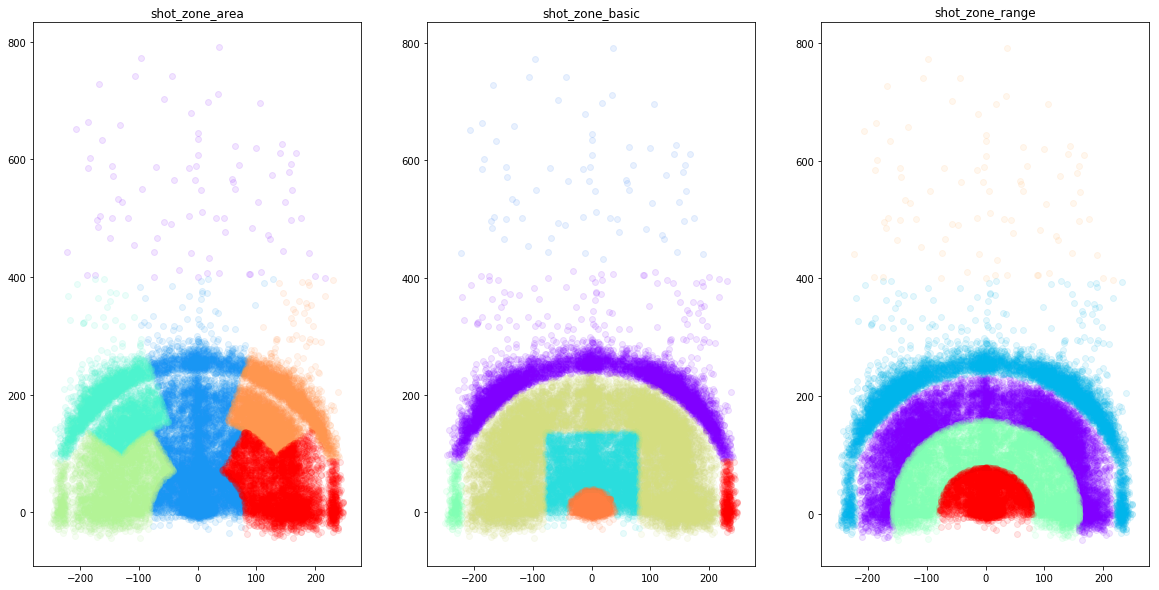

In [12]:
import matplotlib.cm as cm
plt.figure(figsize = (20,10))
#彩虹图cm
def scatter_plot_by_group(col):
    groups = rawKobe.groupby(col)
    colors = cm.rainbow(np.linspace(0,1,len(groups)))
    for g, c in zip(groups,colors):#zip把g,c打包为元组的列表
        #print(g)
        plt.scatter(g[1].loc_x,g[1].loc_y,color=c,alpha = 0.1)
    #画shot_zone_area列
plt.subplot(131)#子图一行三列第一列
scatter_plot_by_group('shot_zone_area')
plt.title('shot_zone_area')
#画shot_zone_basic列
plt.subplot(132)#子图一行三列第二列
scatter_plot_by_group('shot_zone_basic')
plt.title('shot_zone_basic')
 #画shot_zone_range列
plt.subplot(133)#子图一行三列第三列
scatter_plot_by_group('shot_zone_range')
plt.title('shot_zone_range')


In [13]:
#删除无用特征列
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic', \
         'matchup', 'lon', 'lat', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'loc_x', 'loc_y', 'game_event_id', 'game_id', 'game_date']
#print(rawKobe.shape)
#rawKobe.head()
#print(rawKobe.columns.values)
#遍历删除用drop函数
for item in drops:
    #print(item)
    if item in rawKobe.columns.values:#如果列中有，则删除
        rawKobe = rawKobe.drop(item,axis=1)



In [14]:
#one-hot独热编码
#比如一列string值，机器不认识，转换成one-hot 独热编码
#按属性分列，有几个属性就分出几列，某行数据出现某属性则为1，其它没出现的为0
#由此把string值转换成int类型值
#由pd.get_dummies(要转的列，前辍)函数来做这个事。
#结果 ，列名前辍_原列名
print(rawKobe['combined_shot_type'].value_counts())
pd.get_dummies(rawKobe['combined_shot_type'],prefix='combined_shot_type')[0:2]
#dummy 样本 仿制品 [0:2]显示前两行


Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64


,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,0,0,0,1,0,0
1,0,0,0,1,0,0


In [15]:
#切出来后还要拼接回去，用for循环 concat，和原来特征拼在一起
print(rawKobe.columns.values)
#打印看下完整列

['action_type' 'combined_shot_type' 'period' 'playoffs' 'season'
 'shot_made_flag' 'shot_type' 'opponent' 'dist' 'angle' 'remaining_time']


In [16]:
#批量处理，字符串相关列，处理完的新列concat组合到源数据
str_cols = ['action_type', 'combined_shot_type', 'shot_type', 'opponent', 'period', 'season']
for item in str_cols:
    rawKobe = pd.concat([rawKobe,pd.get_dummies(rawKobe[item],prefix=item)],axis = 1)
    rawKobe = rawKobe.drop(item,1)#切分完的，原列删掉。1即为axis=1水平方向上，一般的处理都是。
rawKobe.head()    

,playoffs,shot_made_flag,dist,angle,remaining_time,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,...,season_2006-07,season_2007-08,season_2008-09,season_2009-10,season_2010-11,season_2011-12,season_2012-13,season_2013-14,season_2014-15,season_2015-16
0,0,NaN,181.859836,0.407058,627,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,157.000000,-0.000000,622,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,168.600119,-0.928481,465,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,222.865430,0.903063,412,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,0.000000,1.570796,379,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#处理完数据以后，把数据分成两组
#训练数据+测试数据

#shot_made_flag 进没进球，
if 'shot_made_flag' in rawKobe.columns.values:
    train_kobe = rawKobe[pd.notnull(rawKobe['shot_made_flag'])]
    #print(train_kobe)
    train_label = train_kobe['shot_made_flag']
    #取要监测的进球列 非空的数据，
    train_kobe = train_kobe.drop('shot_made_flag',1)
    #print(train_kobe)
    #排除掉结果列，其它列特征做训练集
    #train_label = train_kobe['shot_made_flag']#已经排除掉了，找不到这列了？
    #用于存放结果？上面已经drop掉了，取不到了，所以移到上面去了，先取结果，再drop掉取训练数据
    #print(train_kobe)
    test_kobe = rawKobe[pd.isnull(rawKobe['shot_made_flag'])]
    #print(test_kobe)
    #取要监测的进球列为空的数据，
    test_kobe = test_kobe.drop('shot_made_flag',1)
    #排除掉结果列，其它列特征做测试集
    #print(test_kobe)

In [45]:
#用随机森林分类器训练上面的数据
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,log_loss
import time


In [46]:
import numpy as np
range_m = np.logspace(0,2,num=5).astype(int)
#构造一个等比数列
#起始值10的0次方，结尾是10的2次方，5个数，中间按规律补上。
range_m


array([  1,   3,  10,  31, 100])

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
#KFold 是 sklearn 包中用于交叉验证的函数。在机器学习中，样本量不充足时，通常使用交叉训练验证。
#在样本量不充足的情况下，为了充分利用数据集对算法效果进行测试，将数据集A随机分为k个包，每次将其中一个包作为测试集，剩下k-1个包作为训练集进行训练

#用随机森林分类器
#找出来哪些参数最适合我们的模型。
#看什么？看什么样的参数可以使得分值最高，什么样的参数可以使得分值最低

#==找到最优n_estimators（随机森林中树的个数）==
print("找到最优n_estimators（随机森林中树的个数）")
min_score = 100000
best_n = 0
scores_n = []
range_n = np.logspace(0,2,num=3).astype(int)
#构造一个等比数列
#起始值10的0次方，结尾是10的2次方，3个数，中间按规律补上。

for n in range_n:
    print("树的个数，{0}".format(n))
    t1 = time.time()
    
    rfc_score = 0.#用于评估模型
    rfc = RandomForestClassifier(n_estimators = n)
    for train_k,test_k in KFold(len(train_kobe), n_folds = 10, shuffle=True):
    #【train_k，test_k返回的是索引号,数据编号，不是数据本身】
    #KFold函数把train_kobe随机拆分为训练集测试集，进行交叉验证，数据少时用kFold
    #n_folds分成10份，
    #shuffle在每次划分时，是否进行洗牌
        #print(train_k)
        #print(test_k)
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        #iloc根据行号来索引，
        #train_kobe.iloc[train_k]训练数据取此份选中的训练集
        #train_label.iloc[train_k]对应的结果进没进球
        #用随机森林分类器进fit训练KFold分好的这些数据
        
        pred = rfc.predict(train_kobe.iloc[test_k])
        #预测
        
        rfc_score += log_loss(train_label.iloc[test_k],pred)/10
        #log_locss计算损失？
    scores_n.append(rfc_score)
    if rfc_score <min_score:
        min_score = rfc_score
        best_n = n
        
    t2 = time.time()
    print('完成处理{0}棵树 （{1:.3f} s）'.format(n,t2-t1))
    #上同{0},{1}代表占位，format里的从左到右赋参
print(best_n,min_score)


找到最优n_estimators（随机森林中树的个数）
树的个数，1
完成处理1棵树 （4.283 s）
树的个数，10
完成处理10棵树 （26.761 s）
树的个数，100
完成处理100棵树 （251.928 s）
100 11.82528428862092
找到最优树最大深度max_depth


AttributeError: 'numpy.ndarray' object has no attribute 'astrype'

In [49]:
#==找到最优树最大深度max_depth==
print("找到最优树最大深度max_depth")
min_score = 100000
best_m = 0
scores_m = []
range_m = np.logspace(0,2,num=3).astype(int)

for m in range_m:
    print("最大深度：{0}".format(m))
    t1 = time.time()
    
    rfc_score = 0.
    rfc = RandomForestClassifier(max_depth=m,n_estimators=best_n)
    #把上面最优树个数代入，看最大深度为每个m时的随机森林分类器fit KFold交叉验证的数据
#得出最优最大深度
    for train_k,test_k in KFold(len(train_kobe),n_folds=10,shuffle=True):
        rfc.fit(train_kobe.iloc[train_k],train_label.iloc[train_k])
        pred = rfc.predict(train_kobe.iloc[test_k])
        rfc_score += log_loss(train_label.iloc[test_k],pred)/10
        #log_loss参数 结果，预测 /10个 得到每个的
    scores_m.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_m = m
        
    t2 = time.time()
    print("完成处理{0}棵树 （{1:.3f} s）".format(m,t2-t1))
    #.3f小数点后保留3位
print(best_m,min_score)


找到最优树最大深度max_depth
最大深度：1
完成处理1棵树 （25.975 s）
最大深度：10
完成处理10棵树 （77.745 s）
最大深度：100
完成处理100棵树 （245.265 s）
10 11.01747473359398


Text(0.5,0,'max depth')

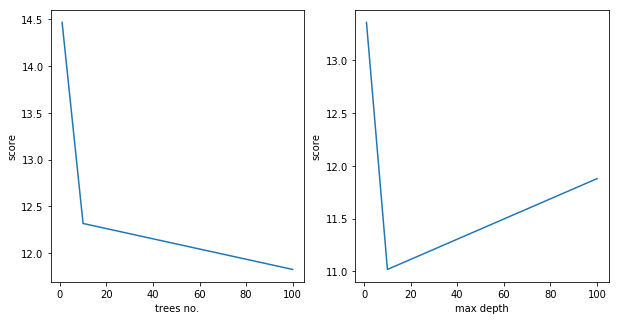

In [50]:
#需要找出来哪些参数最适合我们的模型。
#所以要不断寻找，
#每一次打印出来都是不一样的。
#画出来看下
#看什么？看什么样的参数可以使得分值最高，什么样的参数可以使得分值最低
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n, scores_n)
plt.ylabel('score')
plt.xlabel('trees no.')

plt.subplot(122)
plt.plot(range_m,scores_m)
plt.ylabel('score')
plt.xlabel('max depth')

In [55]:
#把最优树个数和最优最大深度代入，fit 本例的train test数据
model = RandomForestClassifier(n_estimators=best_n,max_depth=best_m)
model.fit(train_kobe,train_label)

#【===以下是自己加的，方法待确定===】
#fit完以后预测一下，看看命中率是有多少的，好像有50%命中率，精度不高。
predM = model.predict(test_kobe)
#log_loss(train_label,pred)
print(predM)

[0. 0. 1. ... 1. 1. 1.]
